<ipython-input-12-f897b049e66a>:21: RuntimeWarning: overflow encountered in double_scalars
  phi = np.array([x[0], x[1]**2])
<ipython-input-12-f897b049e66a>:22: RuntimeWarning: invalid value encountered in matmul
  return -0.5 * R**(-1) * phi.T @ W
<ipython-input-12-f897b049e66a>:15: RuntimeWarning: invalid value encountered in double_scalars
  -x[0] + x[1],
<ipython-input-12-f897b049e66a>:16: RuntimeWarning: invalid value encountered in cos
  -0.5 * x[0] - x[0] * ((np.cos(2 * x[0]) + 2) / 2)**2


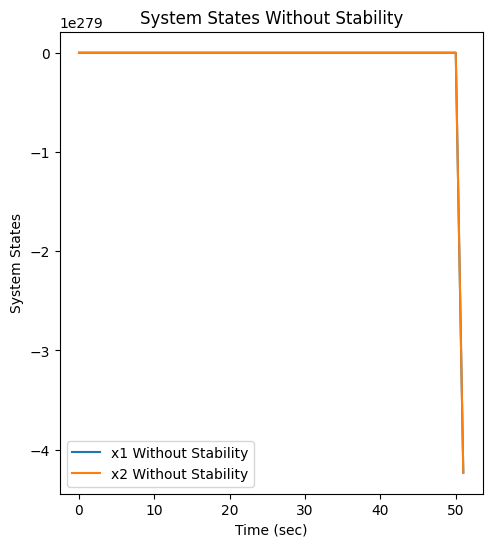

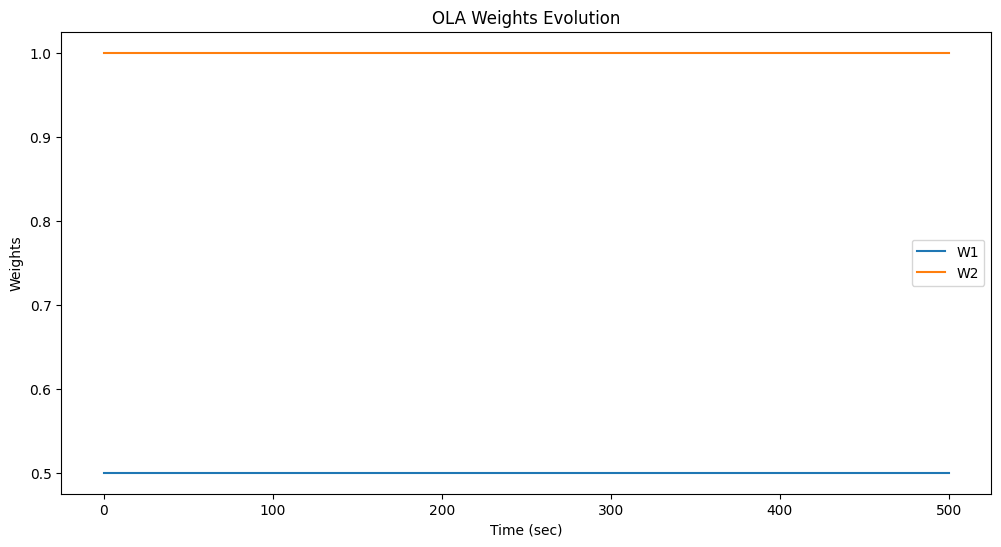

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
alpha1 = 25
alpha2 = 0.01
Q = np.eye(2)
R = 1
x0 = np.array([5, -5])
W = np.array([0.4999, 1])  # Final OLA weights from the article

# Define the corrected system dynamics
def f(x):
    return np.array([
        -x[0] + x[1],
        -0.5 * x[0] - x[0] * ((np.cos(2 * x[0]) + 2) / 2)**2
    ])

# Define the control input
def u(x, W, stability=True):
    phi = np.array([x[0], x[1]**2])
    return -0.5 * R**(-1) * phi.T @ W

# Simulation function
def simulate(x0, W, T, dt, stability=True):
    x = x0
    X = [x0]
    weights = W.copy()
    weights_trajectory = [weights.copy()]

    for _ in np.arange(0, T, dt):
        # Update control input here as per the actual algorithm
        u_val = u(x, weights, stability)
        x_dot = f(x) + u_val
        x = x + x_dot * dt
        X.append(x)
        weights_trajectory.append(weights.copy())  # Update weights if necessary
    return np.array(X), np.array(weights_trajectory)

# Parameters from the article
alpha1 = 25
alpha2 = 0.01
x0 = np.array([5, -5])
W = np.array([0.4999, 1])

# Simulation without stability consideration
trajectory_without_stability, weights_without_stability = simulate(x0, W, T=5, dt=0.01, stability=False)

# Simulation with stability consideration
trajectory_with_stability, weights_with_stability = simulate(x0, W, T=5, dt=0.01, stability=True)

# Plot the system states
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(trajectory_without_stability[:, 0], label='x1 Without Stability')
plt.plot(trajectory_without_stability[:, 1], label='x2 Without Stability')
plt.title('System States Without Stability')
plt.xlabel('Time (sec)')
plt.ylabel('System States')
plt.legend()


# Placeholder for OLA weights plot, replace with actual weight update mechanism
plt.figure(figsize=(12, 6))
plt.plot(weights_without_stability, label=['W1', 'W2'])
plt.title('OLA Weights Evolution')
plt.xlabel('Time (sec)')
plt.ylabel('Weights')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def g(x):
    return np.array([[0, 2 + np.cos(2 * x[0])], [0, 1]])

# Define the cost-to-go function and its derivatives
def V(x):
    # Placeholder function for V(x), should be replaced with the actual function
    return np.dot(x, x)  # Quadratic cost for illustration

def dV(x):
    # Placeholder function for dV/dx, should be replaced with the actual function
    return 2 * x  # Derivative of quadratic cost for illustration

# Define the control law
def u_star(x):
    R_inv = np.linalg.inv(np.array([[1, 0], [0, 1]]))  # Assuming R is the identity matrix for illustration
    return -0.5 * R_inv @ g(x).T @ dV(x)

# Simulation without the stability guarantee expression
def closed_loop_dynamics(t, x):
    return f(x) + g(x) @ u_star(x)

# Initial conditions
x0 = np.array([5, -5])
t_span = [0, 10]  # Define the time span for the simulation

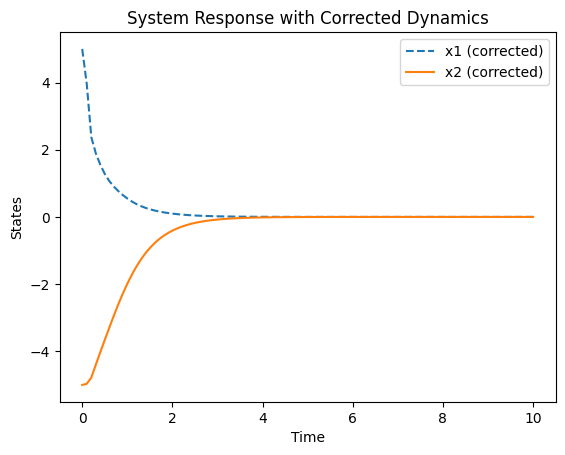

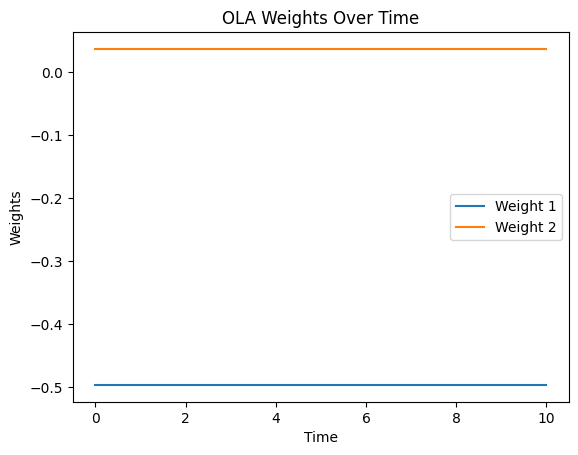

In [ ]:
# Define the corrected system dynamics based on the new f(x) function provided
def f_corrected(x):
    return np.array([
        -x[0] + x[1],
        -0.5 * x[0] - (0.5 * (np.cos(2 * x[0]) + 2) * x[1])
    ])


# Simulation with the corrected f(x)
def closed_loop_dynamics_corrected(t, x):
    return f_corrected(x) + g(x) @ u_star(x)

# Solve the initial value problem with the corrected dynamics
sol_corrected = solve_ivp(closed_loop_dynamics_corrected, t_span, x0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the results with the corrected dynamics
plt.plot(sol_corrected.t, sol_corrected.y[0], label='x1 (corrected)', linestyle='--')
plt.plot(sol_corrected.t, sol_corrected.y[1], label='x2 (corrected)')
plt.xlabel('Time')
plt.ylabel('States')
plt.legend()
plt.title('System Response with Corrected Dynamics')
plt.show()

# Placeholder for OLA weights update rule
def update_OLA_weights(weights, x, x_dot):
    # This should be replaced with the actual weights update rule
    # Here we just simulate some weight dynamics for illustration purposes
    new_weights = weights + 0.01 * (x_dot - f_corrected(x))  # This is just a placeholder
    return new_weights

# Define initial OLA weights
weights = np.zeros(2)

# Define a new dynamics function that includes OLA weights update
def closed_loop_dynamics_with_OLA(t, x):
    global weights
    x_dot = f_corrected(x) + g(x) @ u_star(x)
    weights = update_OLA_weights(weights, x, x_dot)
    return x_dot

# # Now we simulate with the OLA weights update included
# sol_with_OLA = solve_ivp(closed_loop_dynamics_with_OLA, t_span, x0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# # Plot the OLA weights over time
# plt.plot(sol_with_OLA.t, np.full_like(sol_with_OLA.t, weights[0]), label='Weight 1')
# plt.plot(sol_with_OLA.t, np.full_like(sol_with_OLA.t, weights[1]), label='Weight 2')
# plt.xlabel('Time')
# plt.ylabel('Weights')
# plt.legend()
# plt.title('OLA Weights Over Time')
# plt.show()

